# 1. Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Load data

In [2]:
# https://www.kaggle.com/ronitf/heart-disease-uci
DATA_PATH = "../data/raw/heart.csv"

In [3]:
data = pd.read_csv(DATA_PATH)

# 3. Explore data

## 3.1. DataFrame statistics

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## 3.2. Data statistics

In [8]:
categorical_columns = [
    "sex",  # (1 = male; 0 = female)
    "cp",  # chest pain type
    "fbs",  # fasting blood sugar > 120 mg/dl
    "restecg",  # resting electrocardiographic results (values 0, 1, 2)
    "exang",  # exercise induced angina (1 = yes; 0 = no)
    "slope",  # the slope of the peak exercise ST segment
    "ca",  # number of major vessels (0-3) colored by flourosopy
    "thal",  # thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
]

numerical_columns = [
    "age",  # age in years
    "trestbps",  # resting blood pressure
    "chol",  # serum cholestoral in mg/dl
    "thalach",  # maximum heart rate achieved
    "oldpeak",  # ST depression induced by exercise relative to rest
]

Plot the target values distribution:

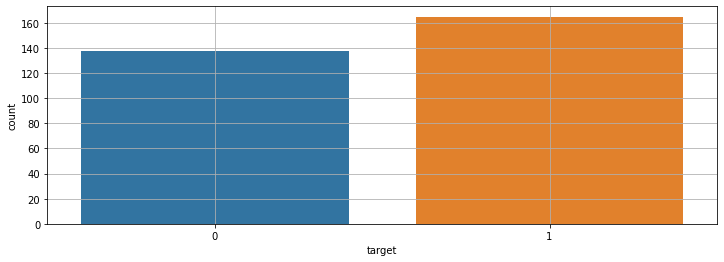

In [9]:
plt.figure(figsize=(12, 4));
sns.countplot(x=data["target"]);
plt.grid();

The target seems pretty balanced. Let's look at the categorical values distributions now:

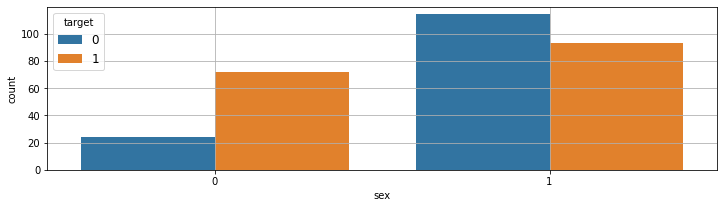

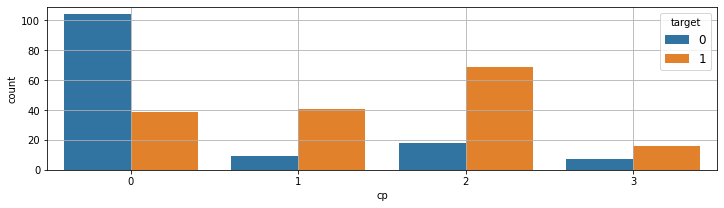

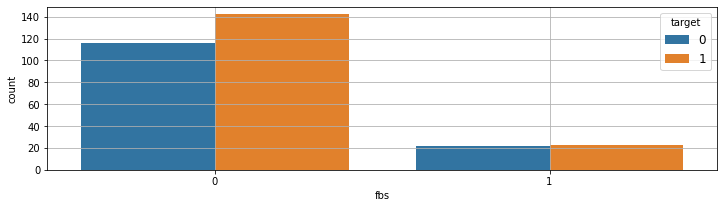

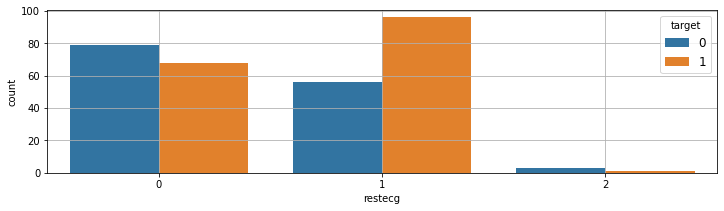

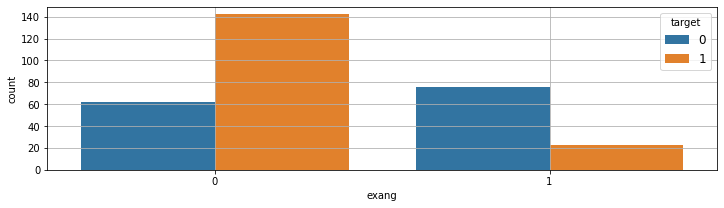

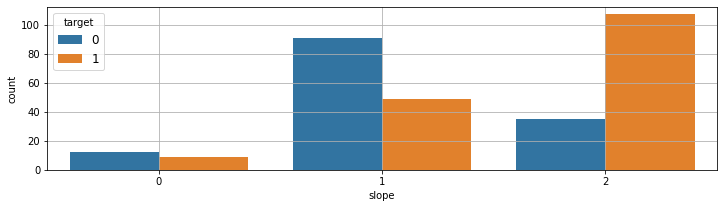

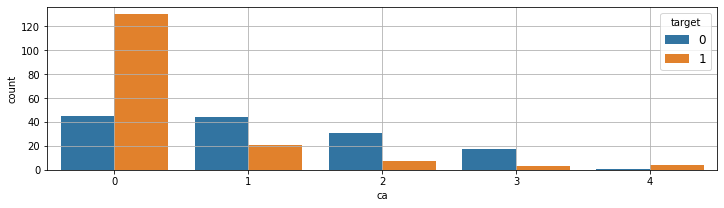

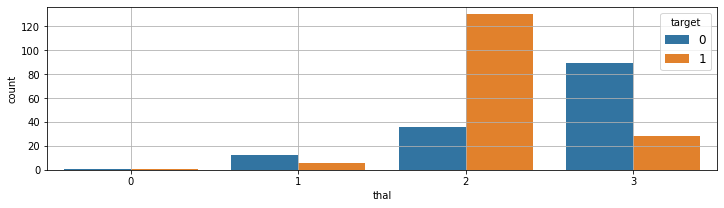

In [10]:
for column in categorical_columns:
    plt.figure(figsize=(12, 3));
    sns.countplot(x=data[column], hue=data["target"]);
    plt.legend(loc="best", title="target", fontsize=12);
    plt.grid();
    plt.show();

We can see significant imbalance in `fbs`, `restecg`, `slope`, `ca`, and `thal` columns.

Let's now look at the numerical value distributions:

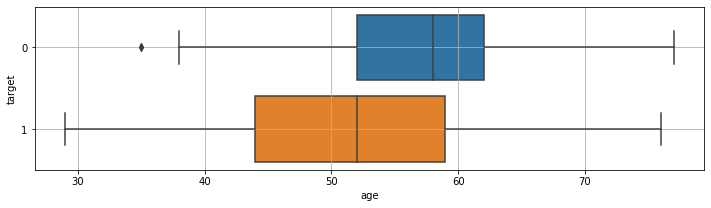

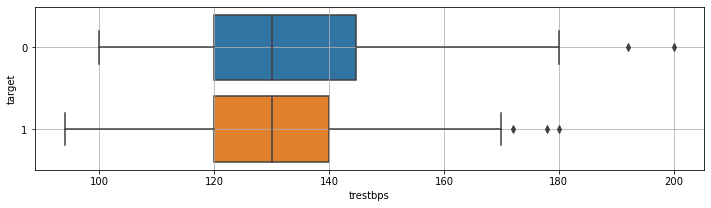

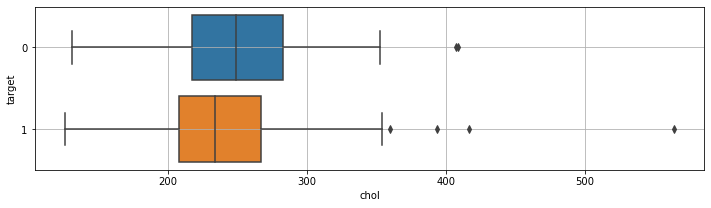

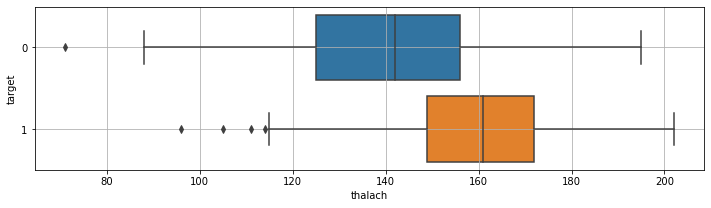

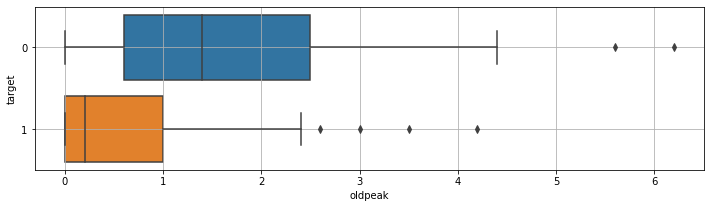

In [11]:
for column in numerical_columns:
    plt.figure(figsize=(12, 3));
    sns.boxplot(x=data[column], y=data["target"], orient="h");
    plt.grid();
    plt.show();

All of the values seem to be normally distributed, except for the `oldpeak` column which hold some logarithmic trend in it. Let's examine it more closely:

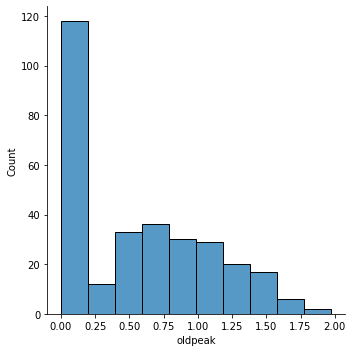

In [12]:
sns.displot(np.log1p(data["oldpeak"]));

There are a lot of zero values.

Cross-correlation of all columns:

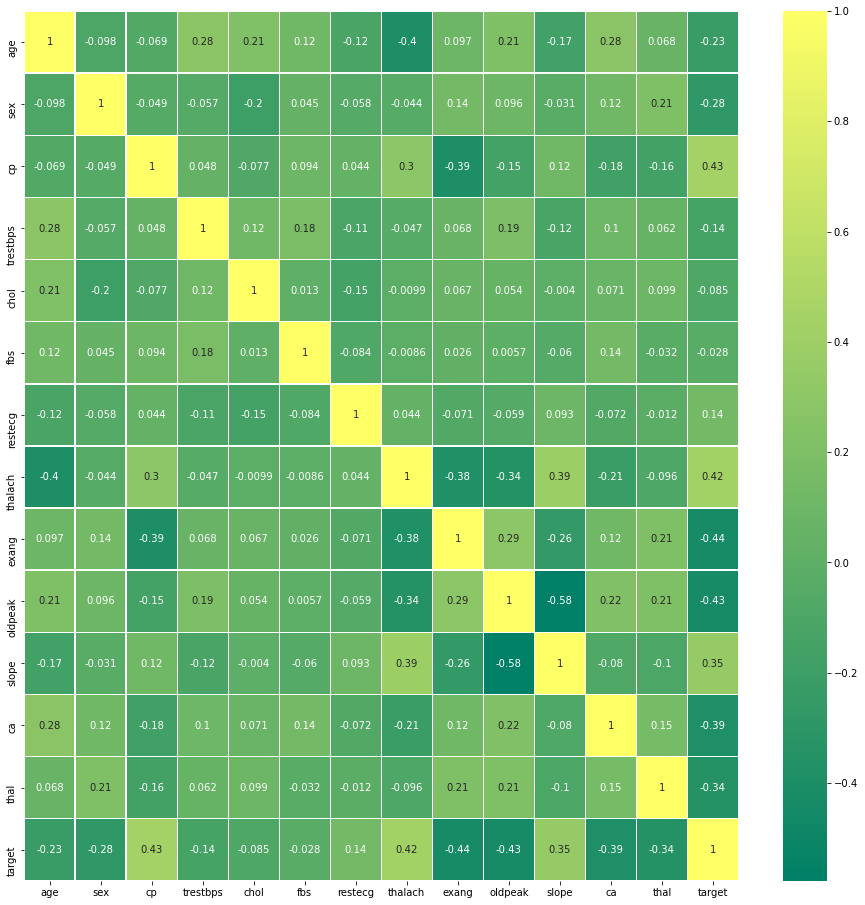

In [13]:
plt.figure(figsize=(16, 16));
sns.heatmap(data.corr(), cmap="summer", annot=True, linewidths=0.5);

The columns seem to be linearly independent.